In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df['TotalCharges']=df['TotalCharges'].replace(' ',0)
df['TotalCharges']=df['TotalCharges'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df['customerID'].duplicated().sum()

np.int64(0)

In [15]:
def conv(value):
  if value=='Yes':
    return 1
  else:
    return 0


In [16]:
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [17]:
#converted 0 & 1 into  senior citizen column into to yes/no

graphs

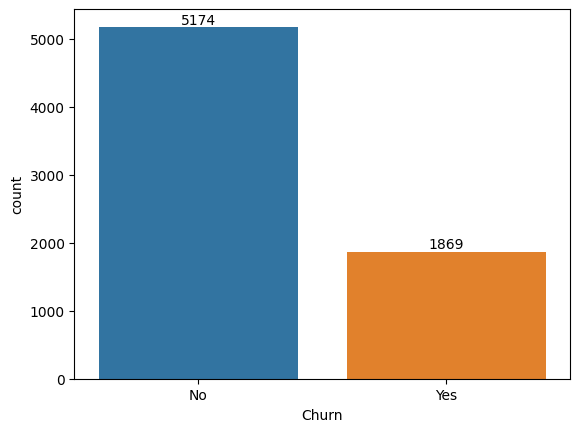

In [18]:
#customers churned out
ax=sns.countplot(data=df,x='Churn',hue='Churn')
for bars in ax.containers:
  ax.bar_label(bars)

([<matplotlib.patches.Wedge at 0x7b5ed4c688f0>,
 [Text(-0.7393678155529122, 0.8144539479458093, 'No'),
  Text(0.7393680809356543, -0.8144537070291521, 'Yes')],
 [Text(-0.40329153575613386, 0.4442476079704414, '73.46%'),
  Text(0.40329168051035685, -0.44424747656135566, '26.54%')])

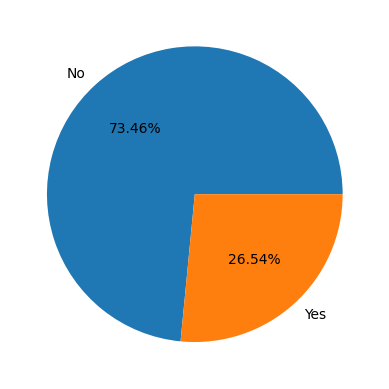

In [19]:
gb=df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')

In [20]:
#from the given pie chart it we found that 26.54% of our customers are churned out

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


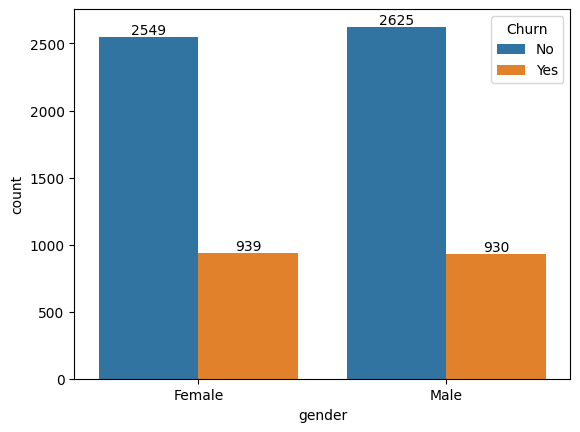

In [22]:
#gender details
d1=sns.countplot(data=df,x='gender',hue='Churn')
for bars in d1.containers:
  d1.bar_label(bars)


In [23]:
#more female users have churned but the gap not so big so no specific insight is gound

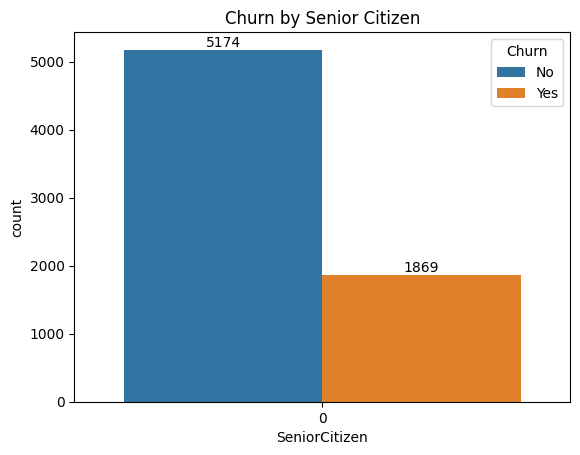

In [24]:
#churn by senior citizen
ax=sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
plt.title('Churn by Senior Citizen')
for bars in ax.containers:
  ax.bar_label(bars)



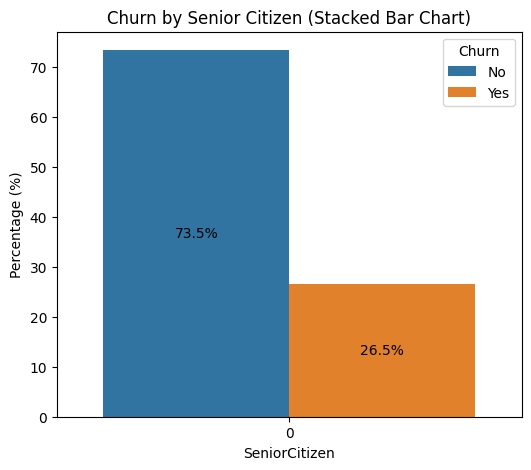

In [25]:
churn_percent = (
    df.groupby(['SeniorCitizen', 'Churn'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .reset_index(name='Percentage', level=[0])
)

# Step 2: Plot stacked bar chart with seaborn
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=churn_percent,
    x='SeniorCitizen',
    y='Percentage',
    hue='Churn'
)

# Step 3: Add labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

# Titles & labels
plt.title("Churn by Senior Citizen (Stacked Bar Chart)")
plt.ylabel("Percentage (%)")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn")
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

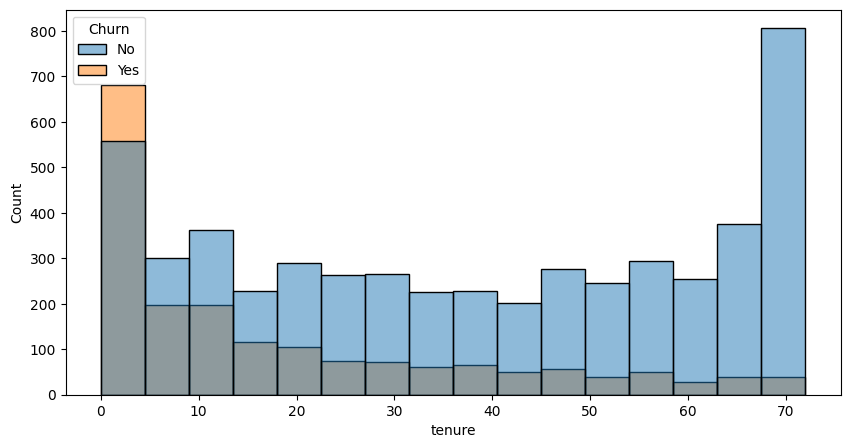

In [26]:
#more details
plt.figure(figsize=(10,5))

sns.histplot(data=df,x='tenure',hue='Churn')

In [27]:
#this shows that the maximum customers churned out in the first month of their tenure  and people who have used our services mre than that are usually retained

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: xlabel='Contract', ylabel='count'>

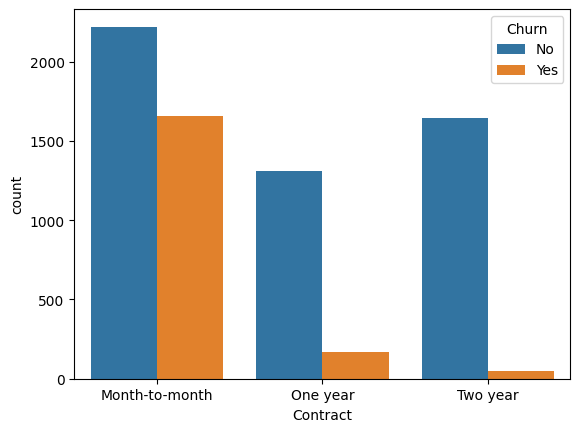

In [29]:
#contract details
sns.countplot(x='Contract',hue='Churn',data=df)

In [30]:
#clients with month to month contract with us usually churn out  we found that already using tenure

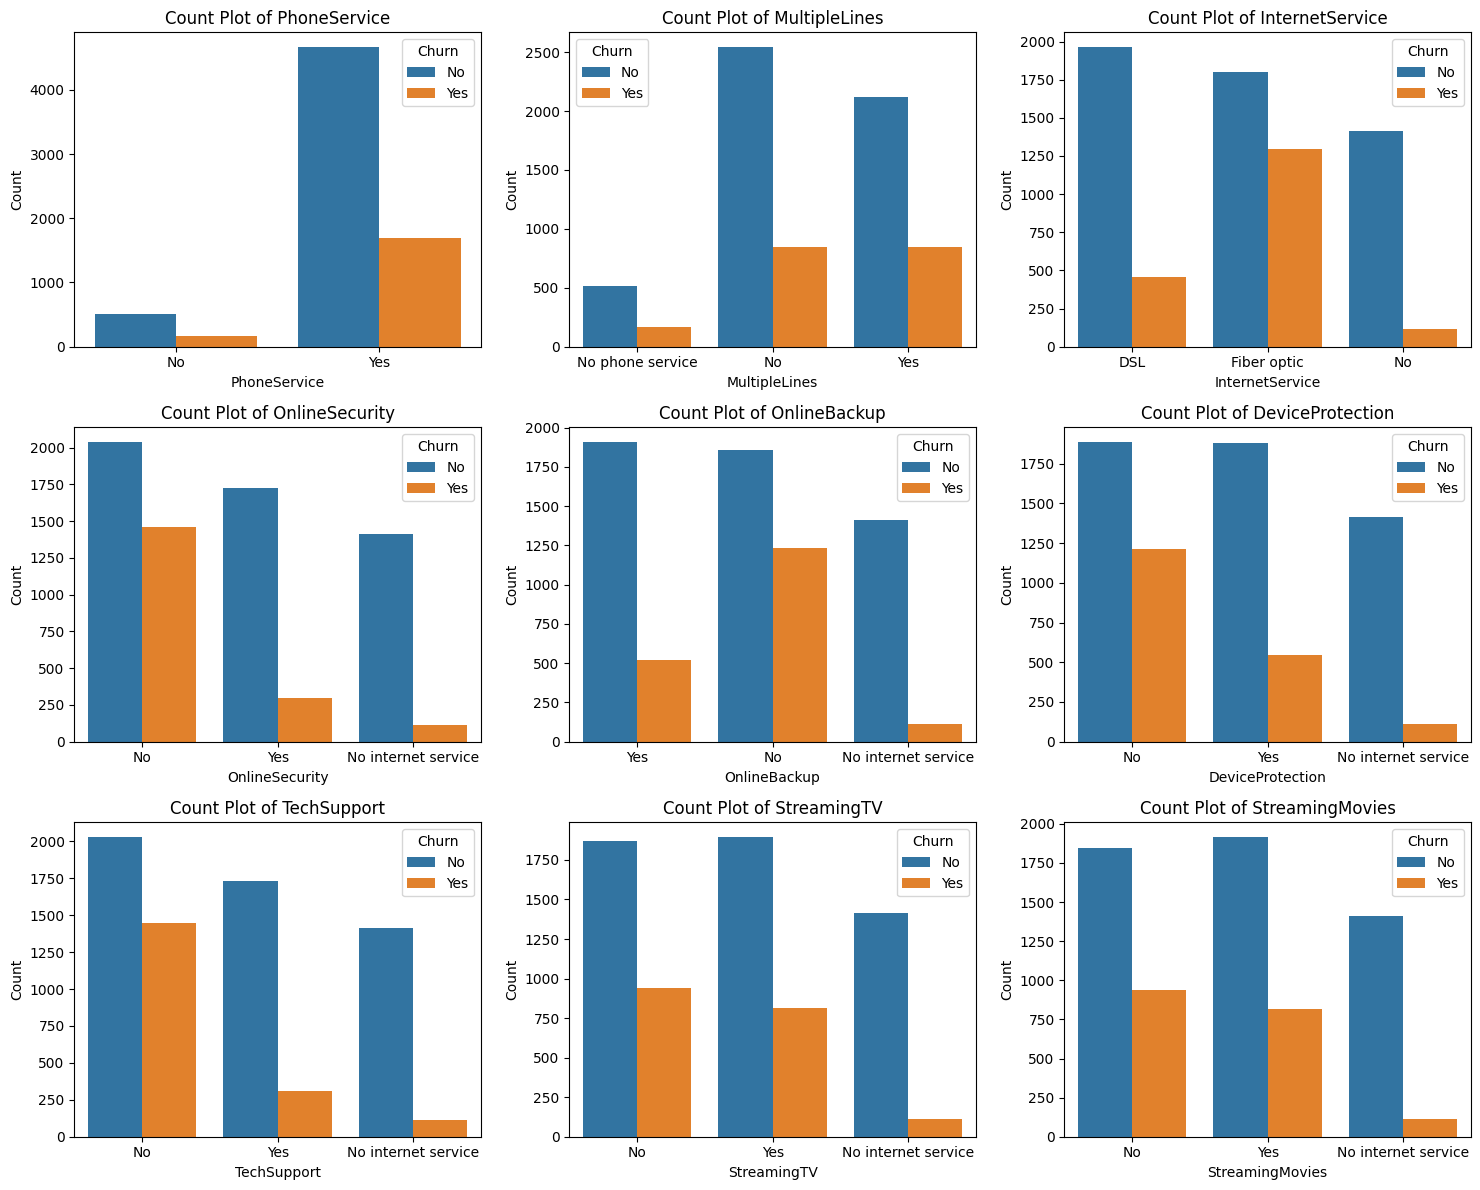

In [31]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [32]:
#from the graphs follwoing detils are being noticed
'''
1.customers with phoneservice are more likely to churn out in the case of phone services but it does not matter as it is compulsory
2.people with multiple lines have a higher churing rat from people who dont have multiple lines but not thst much gap
3.people with fibre optic churnout a lot
4.people wth no online security are more likely to churn out
5.people with no online backup are also more likely to churn out
6.people with no device protection are more likely to churn out
7.people with no tech support are more likely to churn out
8.people with no streaming tv are more likely to churn out but not that much differnce is there
9.people with no streaming movies are more likely to churn out even though differnece is not much

THE OVERALL FIITNG CONCLUSION FROM THIS PEOPLE WITH NO INTERNET SERVICES ARE NOT CHURNING OUT THAT MUCH
'''


'\n1.customers with phoneservice are more likely to churn out in the case of phone services but it does not matter as it is compulsory\n2.people with multiple lines have a higher churing rat from people who dont have multiple lines but not thst much gap\n3.people with fibre optic churnout a lot\n4.people wth no online security are more likely to churn out\n5.people with no online backup are also more likely to churn out\n6.people with no device protection are more likely to churn out\n7.people with no tech support are more likely to churn out\n8.people with no streaming tv are more likely to churn out but not that much differnce is there\n9.people with no streaming movies are more likely to churn out even though differnece is not much\n\nTHE OVERALL FIITNG CONCLUSION FROM THIS PEOPLE WITH NO INTERNET SERVICES ARE NOT CHURNING OUT THAT MUCH\n'

FROM PAYMENTS

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: xlabel='PaymentMethod', ylabel='count'>

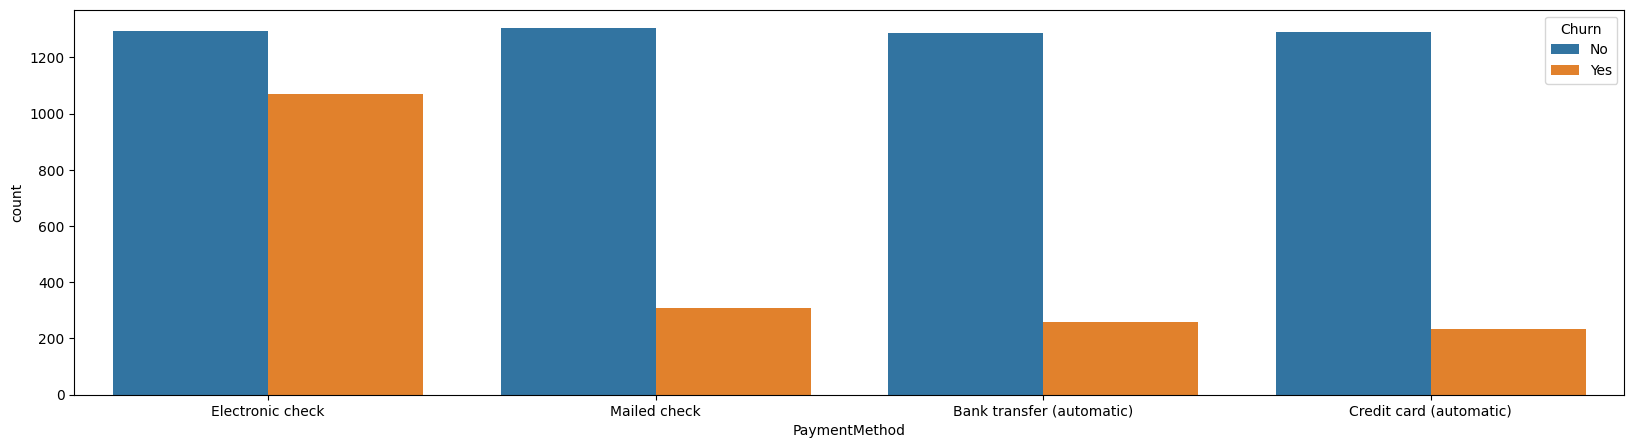

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(data=df,x='PaymentMethod',hue='Churn')

In [35]:
#people with electronic check as paymnet method rw likely to churn out